In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v10/v10_after_eda_bankst.xlsx')

In [ ]:
data_test = pd.read_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v10/v10_after_eda_test_bankst.6.xlsx')

In [ ]:
data.columns

Index(['OpportunityID', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'Credit_Score__c', 'Time_in_Business__c',
       'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'Last3Statments_MA_AdjustedMonthlyDeposits',
       'Last3Statments_MA_AvgDailyBalance', 'Last3Statments_MA_ReturnItemDays',
       'Last3Statments_MA_OverdraftDays', 'Last3Statments_MA_NumReturnItems',
       'Last3Statments_Sum_NumReturnItems', 'FundedAmount', 'Paybackamount',
       'WriteOff_YN', 'FundedWriteOffAmount_Gross', 'WOGross_AdvanceBalance',
       'Avg_ReturnItemdays', 'LatestMonth_ReturnItemDays',
       'PctChangeInReveune', 'PctAvgDailybalance2AvgMonthlyDeposits',
       'TwoMonthAvg_AdjustedMonthlyDeposits', 'Adjus

In [ ]:
data_test.columns

Index(['OpportunityID', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'Credit_Score__c', 'Time_in_Business__c',
       'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'Last3Statments_MA_AdjustedMonthlyDeposits',
       'Last3Statments_MA_AvgDailyBalance', 'Last3Statments_MA_ReturnItemDays',
       'Last3Statments_MA_OverdraftDays', 'Last3Statments_MA_NumReturnItems',
       'Last3Statments_Sum_NumReturnItems', 'FundedAmount', 'Paybackamount',
       'WriteOff_YN', 'FundedWriteOffAmount_Gross', 'WOGross_AdvanceBalance',
       'Avg_ReturnItemdays', 'LatestMonth_ReturnItemDays',
       'PctChangeInReveune', 'PctAvgDailybalance2AvgMonthlyDeposits',
       'TwoMonthAvg_AdjustedMonthlyDeposits', 'Adjus

In [ ]:
data_test[['Industry_E-Commerce', 'Industry_Wholesale Trade', 'Drop_category_Neutral/Null']] = 0

In [ ]:
data_test = data_test[['OpportunityID', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'Credit_Score__c', 'Time_in_Business__c',
       'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'Last3Statments_MA_AdjustedMonthlyDeposits',
       'Last3Statments_MA_AvgDailyBalance', 'Last3Statments_MA_ReturnItemDays',
       'Last3Statments_MA_OverdraftDays', 'Last3Statments_MA_NumReturnItems',
       'Last3Statments_Sum_NumReturnItems', 'FundedAmount', 'Paybackamount',
       'WriteOff_YN', 'FundedWriteOffAmount_Gross', 'WOGross_AdvanceBalance',
       'Avg_ReturnItemdays', 'LatestMonth_ReturnItemDays',
       'PctChangeInReveune', 'PctAvgDailybalance2AvgMonthlyDeposits',
       'TwoMonthAvg_AdjustedMonthlyDeposits', 'AdjustedMonthlyDeposits',
       'drop_percent', 'Is_this_Business_home_based__c_Yes',
       'Industry_Construction', 'Industry_E-Commerce',
       'Industry_Finance, Insurance, Real Estate', 'Industry_Manufacturing',
       'Industry_Mining', 'Industry_Retail', 'Industry_Services',
       'Industry_Transportation & Public Utilities', 'Industry_Wholesale',
       'Industry_Wholesale Trade', 'Drop_category_Neutral/Null',
       'Drop_category_Positive']]

In [ ]:
data.head(3)

,OpportunityID,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousAvgMonthRevenue,Renewal_PreviousAvgDailyBalance,Renewal_TwoWeekBounces,...,"Industry_Finance, Insurance, Real Estate",Industry_Manufacturing,Industry_Mining,Industry_Retail,Industry_Services,Industry_Transportation & Public Utilities,Industry_Wholesale,Industry_Wholesale Trade,Drop_category_Neutral/Null,Drop_category_Positive
0,0062M00000gZQK1QAO,90.00,0.60,1,0,2,43.19,11215.09,8271.55,0,...,1,0,0,0,0,0,0,0,0,1
1,0062M00000lvWxEQAU,96.88,0.78,1,9,1,13.65,28643.61,4936.54,0,...,0,0,0,0,1,0,0,0,0,1
2,0062M00000kxPSSQA2,100.00,0.70,2,0,1,23.79,119022.00,7773.77,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_test.head()

,OpportunityID,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousAvgMonthRevenue,Renewal_PreviousAvgDailyBalance,Renewal_TwoWeekBounces,...,"Industry_Finance, Insurance, Real Estate",Industry_Manufacturing,Industry_Mining,Industry_Retail,Industry_Services,Industry_Transportation & Public Utilities,Industry_Wholesale,Industry_Wholesale Trade,Drop_category_Neutral/Null,Drop_category_Positive
0,0062M00000nqf6oQAA,100.00,0.90,1,1,1,24.24,18043.10,3583.33,0,...,0,0,0,0,1,0,0,0,0,0
1,0062M00000nqfF3QAI,100.00,0.78,1,1,4,16.33,15565.92,1418.70,0,...,0,0,0,0,1,0,0,0,0,1
2,0062M00000nqjtvQAA,100.00,0.49,3,0,2,28.68,31652.75,6569.85,0,...,0,0,0,0,0,0,0,0,0,0
3,0062M00000nqs8FQAQ,100.00,0.60,1,0,2,18.19,9331.39,1851.53,0,...,0,0,0,0,1,0,0,0,0,1
4,0062M00000nr94cQAA,98.33,0.56,1,3,1,21.81,16446.98,4122.46,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
data.shape

(3134, 46)

In [ ]:
data_test.shape

(486, 46)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 46 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   OpportunityID                               3134 non-null   object 
 1   Renewal_PreviousPace                        3134 non-null   float64
 2   Renewal_PreviousPaidPercentageOfRTR         3134 non-null   float64
 3   Renewal_CountPreviousDeals                  3134 non-null   int64  
 4   Renewal_PreviousCountBounces                3134 non-null   int64  
 5   Renewal_PreviousPosition                    3134 non-null   int64  
 6   Renewal_PreviousHBwLCF                      3134 non-null   float64
 7   Renewal_PreviousAvgMonthRevenue             3134 non-null   float64
 8   Renewal_PreviousAvgDailyBalance             3134 non-null   float64
 9   Renewal_TwoWeekBounces                      3134 non-null   int64  
 10  NumberOfBank

In [ ]:
data.corr()['WriteOff_YN'].sort_values()

NumberOfBankStatements                       -0.308852
Time_in_Business__c                          -0.108244
Renewal_PreviousPaidPercentageOfRTR          -0.094702
Renewal_CountPreviousDeals                   -0.082606
Industry_Services                            -0.073244
Credit_Score__c                              -0.059382
Industry_Retail                              -0.032903
HB_with_LCF_Payment__c                       -0.020881
Industry_Mining                              -0.018274
PctAvgDailybalance2AvgMonthlyDeposits        -0.014980
Renewal_PreviousHBwLCF                       -0.014973
Industry_Manufacturing                       -0.006627
TwoMonthAvg_AdjustedMonthlyDeposits          -0.001790
Drop_category_Neutral/Null                   -0.001384
Last3Statments_Sum_NumReturnItems            -0.000225
Last3Statments_MA_NumReturnItems             -0.000169
Last3Statments_MA_AdjustedMonthlyDeposits     0.000823
Renewal_PreviousPosition                      0.001372
Last3Statm

In [ ]:
data.drop(['FundedWriteOffAmount_Gross','WOGross_AdvanceBalance'],axis = 1).corr()['WriteOff_YN'].sort_values()

NumberOfBankStatements                       -0.308852
Time_in_Business__c                          -0.108244
Renewal_PreviousPaidPercentageOfRTR          -0.094702
Renewal_CountPreviousDeals                   -0.082606
Industry_Services                            -0.073244
Credit_Score__c                              -0.059382
Industry_Retail                              -0.032903
HB_with_LCF_Payment__c                       -0.020881
Industry_Mining                              -0.018274
PctAvgDailybalance2AvgMonthlyDeposits        -0.014980
Renewal_PreviousHBwLCF                       -0.014973
Industry_Manufacturing                       -0.006627
TwoMonthAvg_AdjustedMonthlyDeposits          -0.001790
Drop_category_Neutral/Null                   -0.001384
Last3Statments_Sum_NumReturnItems            -0.000225
Last3Statments_MA_NumReturnItems             -0.000169
Last3Statments_MA_AdjustedMonthlyDeposits     0.000823
Renewal_PreviousPosition                      0.001372
Last3Statm

In [ ]:
data.shape

(3134, 46)

In [ ]:
#  Information value and weight of evidence
def iv_woe(data, target, bins=10, show_woe=False):

    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()

    #Extract Column Names
    cols = data.columns

    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d0 = d0.astype({"x": str})
        d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events']-d['% of Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF


In [ ]:
iv, woe = iv_woe(data = data, target = 'WriteOff_YN', bins=20, show_woe = False)

Information value of OpportunityID is 1.599503
Information value of Renewal_PreviousPace is 0.003135
Information value of Renewal_PreviousPaidPercentageOfRTR is 0.089509
Information value of Renewal_CountPreviousDeals is 0.062194
Information value of Renewal_PreviousCountBounces is 0.026787
Information value of Renewal_PreviousPosition is 0.002303
Information value of Renewal_PreviousHBwLCF is 0.02062
Information value of Renewal_PreviousAvgMonthRevenue is 0.057557
Information value of Renewal_PreviousAvgDailyBalance is 0.044939
Information value of Renewal_TwoWeekBounces is 0.011913
Information value of NumberOfBankStatements is 0.943863
Information value of Credit_Score__c is 0.066556
Information value of Time_in_Business__c is 0.191343
Information value of BBC_Position__c is 0.001993
Information value of HB_with_LCF_Payment__c is 0.024835
Information value of Last3Statments_MA_AdjustedMonthlyDeposits is 0.049792
Information value of Last3Statments_MA_AvgDailyBalance is 0.023364
Info

In [ ]:
data_corr = data.corr()['WriteOff_YN']
(data_corr**2)**0.5

Renewal_PreviousPace                          0.003269
Renewal_PreviousPaidPercentageOfRTR           0.094702
Renewal_CountPreviousDeals                    0.082606
Renewal_PreviousCountBounces                  0.020369
Renewal_PreviousPosition                      0.001372
Renewal_PreviousHBwLCF                        0.014973
Renewal_PreviousAvgMonthRevenue               0.031837
Renewal_PreviousAvgDailyBalance               0.025516
Renewal_TwoWeekBounces                        0.052650
NumberOfBankStatements                        0.308852
Credit_Score__c                               0.059382
Time_in_Business__c                           0.108244
BBC_Position__c                               0.012783
HB_with_LCF_Payment__c                        0.020881
Last3Statments_MA_AdjustedMonthlyDeposits     0.000823
Last3Statments_MA_AvgDailyBalance             0.003192
Last3Statments_MA_ReturnItemDays              0.029656
Last3Statments_MA_OverdraftDays               0.037383
Last3Statm

In [ ]:
corr_df = pd.DataFrame((data_corr**2)**0.5)
corr_df.sort_values(by = 'WriteOff_YN',ascending = False)[3:]

,WriteOff_YN
NumberOfBankStatements,0.308852
Time_in_Business__c,0.108244
Renewal_PreviousPaidPercentageOfRTR,0.094702
drop_percent,0.093628
Drop_category_Positive,0.091829
Renewal_CountPreviousDeals,0.082606
Industry_Services,0.073244
Industry_Transportation & Public Utilities,0.063958
Credit_Score__c,0.059382
Industry_Construction,0.052951


In [ ]:
iv.sort_values(by='IV',ascending = False)[3:]

,Variable,IV
0,NumberOfBankStatements,0.943863
0,Time_in_Business__c,0.191343
0,drop_percent,0.104054
0,Renewal_PreviousPaidPercentageOfRTR,0.089509
0,AdjustedMonthlyDeposits,0.070209
0,Credit_Score__c,0.066556
0,Renewal_CountPreviousDeals,0.062194
0,Renewal_PreviousAvgMonthRevenue,0.057557
0,PctChangeInReveune,0.055972
0,Avg_ReturnItemdays,0.054836


### Model Training

In [ ]:
# X = data.drop(['WriteOff_YN','Industry','Industry_Group__c','OpportunityID',
#               'FundedWriteOffAmount_Net','PctChangeInReveune','PctAvgDailybalance2AvgMonthlyRevenue',
#               'LatestMonth_ReturnItemDays','Avg_ReturnItemdays'],axis = 1)
# y = data['WriteOff_YN']

In [ ]:
X = data.drop(['WriteOff_YN','OpportunityID','FundedWriteOffAmount_Gross','LatestMonth_ReturnItemDays',
              'Paybackamount','FundedAmount', 'WOGross_AdvanceBalance','Last3Statments_Sum_NumReturnItems'],axis = 1)
y = data['WriteOff_YN']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Renewal_PreviousPace                        3134 non-null   float64
 1   Renewal_PreviousPaidPercentageOfRTR         3134 non-null   float64
 2   Renewal_CountPreviousDeals                  3134 non-null   int64  
 3   Renewal_PreviousCountBounces                3134 non-null   int64  
 4   Renewal_PreviousPosition                    3134 non-null   int64  
 5   Renewal_PreviousHBwLCF                      3134 non-null   float64
 6   Renewal_PreviousAvgMonthRevenue             3134 non-null   float64
 7   Renewal_PreviousAvgDailyBalance             3134 non-null   float64
 8   Renewal_TwoWeekBounces                      3134 non-null   int64  
 9   NumberOfBankStatements                      3134 non-null   int64  
 10  Credit_Score

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
X_test = data_test.drop(['WriteOff_YN','OpportunityID','FundedWriteOffAmount_Gross','LatestMonth_ReturnItemDays',
              'Paybackamount','FundedAmount', 'WOGross_AdvanceBalance','Last3Statments_Sum_NumReturnItems'],axis = 1)
y_test = data_test['WriteOff_YN']

In [ ]:
print('Shape of x_train is: {}'.format(X_train.shape))
print('Shape of x_val is: {}'.format(X_val.shape))
print('Shape of x_test is: {}'.format(X_test.shape))
print('----------------------------------------------')
print('Shape of y_train is: {}'.format(y_train.shape))
print('Shape of y_val is: {}'.format(y_val.shape))
print('Shape of y_test is: {}'.format(y_test.shape))

Shape of x_train is: (2507, 38)
Shape of x_val is: (627, 38)
Shape of x_test is: (486, 38)
----------------------------------------------
Shape of y_train is: (2507,)
Shape of y_val is: (627,)
Shape of y_test is: (486,)


In [ ]:
#checking the skewness of train set
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_train).count(1)/len(y_train))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_train).count(0)/len(y_train)*100)))

Percentage of  having WriteOFF_YN = 1: 26.0%
Percentage of  having WriteOFF_YN = 0: 74.0%


In [ ]:
#checking the skewness of validation set
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_val).count(1)/len(y_val))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_val).count(0)/len(y_val)*100)))

Percentage of  having WriteOFF_YN = 1: 25.0%
Percentage of  having WriteOFF_YN = 0: 75.0%


In [ ]:
#checking the skewness of validation set
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_test).count(1)/len(y_test))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_test).count(0)/len(y_test)*100)))

Percentage of  having WriteOFF_YN = 1: 23.0%
Percentage of  having WriteOFF_YN = 0: 77.0%


#XGBoost Parameters Explanation


1.   eta - Learning rate - Prevents overfitting - Default = 0.3 - Range = [0,1]
2.   gamma - min_split_loss - Min loss reduction for a further partition - default = 0 - range = [0,infinity] (Higher gamma value means smaller loss reduction which means more splits. As a result, more conservative model,chances of improvement in accuracy.Higher values can also cause overfitting).
3.  lambda - L2 regularisation - default=1 - Higher value means more conservative model, likely to overfit
4. alpha - L1 regularization - default=0 - Higher values lead to more conservative model, likely to overfit
5. scale_pos_weight - default=1 - Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances).









In [ ]:
quantile_1 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.25)
quantile_1

816.25

In [ ]:
quantile_2 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.5)
quantile_2

3526.08

In [ ]:
quantile_3 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.75)
quantile_3

8282.25

In [ ]:
weight = []
for i in data.index:
  if data['WriteOff_YN'][i] == 0:
    weight.append(1.0)
  else:
    if data['FundedWriteOffAmount_Gross'][i] < quantile_1:
      weight.append(1.25)
    elif data['FundedWriteOffAmount_Gross'][i] >= quantile_1 and data['FundedWriteOffAmount_Gross'][i] < quantile_2:
      weight.append(1.5)
    elif data['FundedWriteOffAmount_Gross'][i] >= quantile_2 and data['FundedWriteOffAmount_Gross'][i] < quantile_3:
      weight.append(2.0)
    else:
      weight.append(2.25)

weight = np.array(weight)
len(weight)

3134

In [ ]:
# weight = []
# for i in y_train.index:
#   if y_train[i] == 0:
#     weight.append(1.0)
#   else:
#     if data['FundedWriteOffAmount_Gross'][i] < quantile_1:
#       weight.append(1.25)
#     elif data['FundedWriteOffAmount_Gross'][i] >= quantile_1 and data['FundedWriteOffAmount_Gross'][i] < quantile_2:
#       weight.append(1.5)
#     elif data['FundedWriteOffAmount_Gross'][i] >= quantile_2 and data['FundedWriteOffAmount_Gross'][i] < quantile_3:
#       weight.append(2.0)
#     else:
#       weight.append(2.25)

# weight = np.array(weight)
# len(weight)

In [ ]:
# data[(data['FundedWriteOffAmount_Gross'] >= quantile_2) & (data['FundedWriteOffAmount_Gross'] < quantile_3)]

In [ ]:
# median_WO = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].median()
# median_WO

In [ ]:
# weight = []
# for i in data.index:
#   if data['FundedWriteOffAmount_Gross'][i] > median_WO:
#     weight.append(2)
#   else:
#     weight.append(1)
# weight = np.array(weight)
# len(weight)

In [ ]:
# L1 = 0
# L2 = 10
# lr = 0.3

In [ ]:
parameters = {
    'eval_metric':['aucpr'],
    'use_label_encoder':[False],
    'n_estimators':[1,5,10,15,20,25,30,40], # number of decision trees used in Xgboost model
    'scale_pos_weight': [1,2,3,4,5,6,7,8,9,10], # used to tackle unbalanced datasets(same as upsampling, SMOTE,etc)
    'subsample':[0.3,0.75], # how much % of data you are taking for estimator building.
    'reg_alpha':[0],
    'reg_lambda':[1], #perform L2 regularization on leaf weights(tackle overfitting)(control how deep a tree can grow)
    'learning_rate':[0.3], # Learning rate(new weight updation after every epoch in a conservative manner)
    'gamma':[0.25], #Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
    'colsample_bytree':[1],
    'colsample_bylevel':[1],
    'colsample_bynode':[1]
}

In [ ]:
from datetime import datetime as dt
start = dt.now()
x_cfl = XGBClassifier(objective='binary:logistic') #initializing xgboost model

clf = GridSearchCV(estimator=x_cfl,
                   param_grid=parameters,
                   scoring='roc_auc',
                   n_jobs=-1,
                   cv=5,
                   return_train_score=True)

clf.fit(X_train,y_train,sample_weight = weight)
running_secs = (dt.now() - start).seconds
running_secs

44

In [ ]:
# best parameters after training
clf.best_estimator_

XGBClassifier(eval_metric='aucpr', gamma=0.25, learning_rate=0.3,
              n_estimators=10, scale_pos_weight=3, subsample=0.75,
              use_label_encoder=False)

In [ ]:
clf.best_params_

{'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': 'aucpr',
 'gamma': 0.25,
 'learning_rate': 0.3,
 'n_estimators': 10,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 3,
 'subsample': 0.75,
 'use_label_encoder': False}

In [ ]:
predict_y_test = clf.predict(X_test)
predict_y_proba_test = clf.predict_proba(X_test)
predict_y_train = clf.predict(X_train)
predict_y_proba_train = clf.predict_proba(X_train)
predict_y_val = clf.predict(X_val)
predict_y_proba_val = clf.predict_proba(X_val)

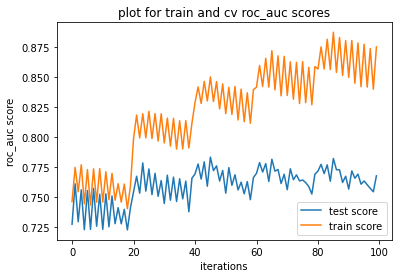

In [ ]:
#here test score refers to the cv score
x_axis = [i for i in range(100)]
plt.plot(x_axis,clf.cv_results_['mean_test_score'][:100])
plt.plot(x_axis,clf.cv_results_['mean_train_score'][:100])
plt.legend(["test score", "train score"], loc ="lower right")
plt.xlabel('iterations')
plt.ylabel('roc_auc score')
plt.title('plot for train and cv roc_auc scores')
plt.show()

In [ ]:
from sklearn.metrics import precision_score,recall_score

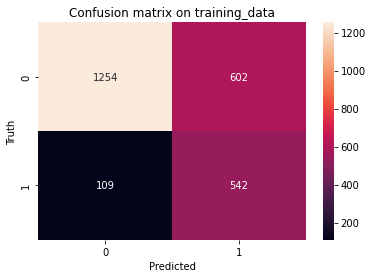

----------------------------
TP: 542
TN: 1254
FP: 602
FN: 109
F1-score: 0.603899721448468
accuracy: 0.7163940965297168
Precision: 0.4737762237762238
Recall: 0.8325652841781874


In [ ]:
# on training data
sns.heatmap(confusion_matrix(y_train,predict_y_train), annot=True, fmt='d')
plt.title('Confusion matrix on training_data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_train, predict_y_train).ravel()
print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))


print('F1-score: {}'.format(f1_score(predict_y_train,y_train)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_train,predict_y_train)))
print('Recall: {}'.format(recall_score(y_train,predict_y_train)))

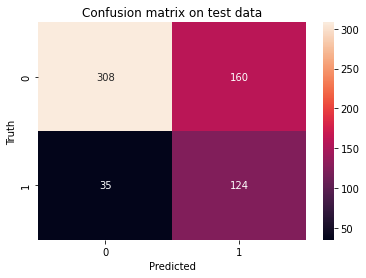

----------------------------
----------------------------
TP: 124
TN: 308
FP: 160
FN: 35
----------------------------
F1-score: 0.5598194130925508
accuracy: 0.6889952153110048
Precision: 0.43661971830985913
Recall: 0.779874213836478


In [ ]:
# on validation set
sns.heatmap(confusion_matrix(y_val,predict_y_val), annot=True, fmt='d')
plt.title('Confusion matrix on test data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_val,predict_y_val).ravel()
print("----------------------------")

print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print("----------------------------")

print('F1-score: {}'.format(f1_score(y_val,predict_y_val)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_val,predict_y_val)))
print('Recall: {}'.format(recall_score(y_val,predict_y_val)))

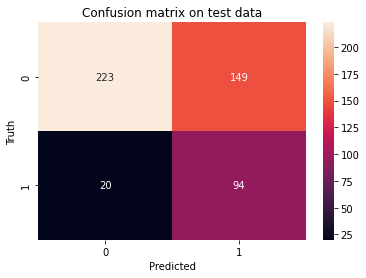

----------------------------
----------------------------
TP: 94
TN: 223
FP: 149
FN: 20
----------------------------
F1-score: 0.5266106442577031
accuracy: 0.6522633744855967
Precision: 0.3868312757201646
Recall: 0.8245614035087719


In [ ]:
# on test set
sns.heatmap(confusion_matrix(y_test,predict_y_test), annot=True, fmt='d')
plt.title('Confusion matrix on test data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_test,predict_y_test).ravel()
print("----------------------------")

print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print("----------------------------")

print('F1-score: {}'.format(f1_score(y_test,predict_y_test)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_test,predict_y_test)))
print('Recall: {}'.format(recall_score(y_test,predict_y_test)))

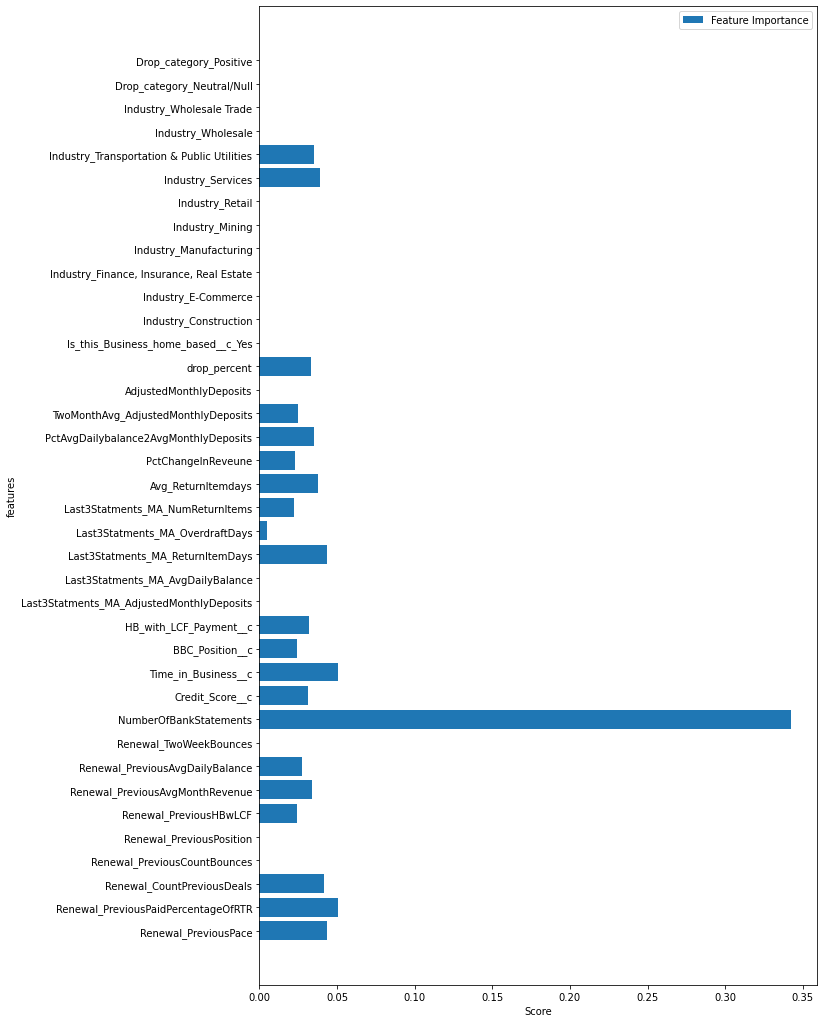

In [ ]:
# check for feature importance
features = X_train.columns
features
gain = clf.best_estimator_.feature_importances_
plt.figure(figsize = (10, 18))
plt.barh(features , gain)
plt.xlabel("Score")
plt.ylabel("features")
plt.legend(["Feature Importance"])
plt.show()

In [ ]:
feature_importance = pd.DataFrame({'Features':features,'Coefficients':gain})
feature_importance.sort_values(by = 'Coefficients',ascending = False)[:10]

,Features,Coefficients
9,NumberOfBankStatements,0.342356
11,Time_in_Business__c,0.050766
1,Renewal_PreviousPaidPercentageOfRTR,0.050534
16,Last3Statments_MA_ReturnItemDays,0.043789
0,Renewal_PreviousPace,0.043746
2,Renewal_CountPreviousDeals,0.041601
32,Industry_Services,0.039209
19,Avg_ReturnItemdays,0.037600
21,PctAvgDailybalance2AvgMonthlyDeposits,0.035174
33,Industry_Transportation & Public Utilities,0.035030


# For Train data

In [ ]:
#converting this into a dataframe as y_test is a series {we get retained indexes}
check = pd.DataFrame(y_train)
check

,WriteOff_YN
755,0
3123,0
221,0
543,0
1395,0
...,...
3092,0
1095,0
1130,0
1294,0


In [ ]:
check['Predicted Values'] = predict_y_train

In [ ]:
check

,WriteOff_YN,Predicted Values
755,0,0
3123,0,0
221,0,0
543,0,0
1395,0,0
...,...,...
3092,0,0
1095,0,0
1130,0,1
1294,0,1


In [ ]:
predict_y_proba_train

array([[0.5076954 , 0.49230462],
       [0.75350183, 0.24649815],
       [0.50669456, 0.49330544],
       ...,
       [0.4649955 , 0.5350045 ],
       [0.42481738, 0.5751826 ],
       [0.837158  , 0.16284198]], dtype=float32)

In [ ]:
write_off1 = []
for i in predict_y_proba_train:
  write_off1.append(i[1])


In [ ]:
check['Predicted_Prob_WO = 1'] = write_off1

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
755,0,0,0.492305
3123,0,0,0.246498
221,0,0,0.493305
543,0,0,0.355478
1395,0,0,0.407308
...,...,...,...
3092,0,0,0.248270
1095,0,0,0.075513
1130,0,1,0.535004
1294,0,1,0.575183


In [ ]:
check['OpportunityID'] = None

In [ ]:
for i in check.index:
  check['OpportunityID'][i] = data['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
755,0,0,0.492305,0062M00000gZCzBQAW
3123,0,0,0.246498,0062M00000mzOPwQAM
221,0,0,0.493305,0062M00000hmTQ7QAM
543,0,0,0.355478,0062M00000gYK0WQAW
1395,0,0,0.407308,0062M00000nZQvIQAW
...,...,...,...,...
3092,0,0,0.248270,0062M00000iso7OQAQ
1095,0,0,0.075513,0062M00000kxY3XQAU
1130,0,1,0.535004,0062M00000jKY1WQAW
1294,0,1,0.575183,0062M00000kylvVQAQ


In [ ]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.9258567
Min_propability_value:  0.046328355


Max_Probabilty - 0.89, Min_Probabilty - 0.15 - 0 percentile value
Explaination - In the range of 0 to 1, .89 - 100 percentile value

How deciles are made:
1) 10 deciles are formed based on the distribution of quantiles - we need to break percentile into 10 bins

In [ ]:
check['Decile'] = None

In [ ]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5, funded_amt_d6, funded_amt_d7, funded_amt_d8, funded_amt_d9, funded_amt_d10 = 0,0,0,0,0,0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10 = 0,0,0,0,0,0,0,0,0,0
advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10 = 0,0,0,0,0,0,0,0,0,0
for i in check.index:

  if check["Predicted_Prob_WO = 1"][i]>check["Predicted_Prob_WO = 1"].quantile(0.90):
    d=10
    funded_amt_d10 = funded_amt_d10+data['FundedAmount'][i]
    gross_amt_d10 = gross_amt_d10 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d10 = advanced_amt_d10 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.80)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.90)):
    d=9
    funded_amt_d9 = funded_amt_d9+data['FundedAmount'][i]
    gross_amt_d9 = gross_amt_d9 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d9 = advanced_amt_d9 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.70)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.80)):
    d=8
    funded_amt_d8 = funded_amt_d8+data['FundedAmount'][i]
    gross_amt_d8 = gross_amt_d8 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d8 = advanced_amt_d8 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.60)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.70)):
    d=7
    funded_amt_d7 = funded_amt_d7+data['FundedAmount'][i]
    gross_amt_d7 = gross_amt_d7 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d7 = advanced_amt_d7+ data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.50)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.60)):
    d=6
    funded_amt_d6 = funded_amt_d6+data['FundedAmount'][i]
    gross_amt_d6 = gross_amt_d6+ data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d6 = advanced_amt_d6 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.40)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.50)):
    d=5
    funded_amt_d5 = funded_amt_d5+data['FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d5 = advanced_amt_d5 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.30)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.40)):
    d=4
    funded_amt_d4 = funded_amt_d4+data['FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d4 = advanced_amt_d4 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.20)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.30)):
    d=3
    funded_amt_d3 = funded_amt_d3+data['FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d3 = advanced_amt_d3 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.10)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.20)):
    d=2
    funded_amt_d2 = funded_amt_d2+data['FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d2 = advanced_amt_d2 + data['WOGross_AdvanceBalance'][i]
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data['FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d1 = advanced_amt_d1 + data['WOGross_AdvanceBalance'][i]
  check['Decile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
755,0,0,0.492305,0062M00000gZCzBQAW,6
3123,0,0,0.246498,0062M00000mzOPwQAM,3
221,0,0,0.493305,0062M00000hmTQ7QAM,6
543,0,0,0.355478,0062M00000gYK0WQAW,5
1395,0,0,0.407308,0062M00000nZQvIQAW,5
...,...,...,...,...,...
3092,0,0,0.248270,0062M00000iso7OQAQ,4
1095,0,0,0.075513,0062M00000kxY3XQAU,1
1130,0,1,0.535004,0062M00000jKY1WQAW,6
1294,0,1,0.575183,0062M00000kylvVQAQ,7


In [ ]:
check['Predicted_Prob_WO = 1'].nunique()

1601

In [ ]:
check['Predicted_Prob_WO = 1'].max()

0.9258567

In [ ]:
check['Predicted_Prob_WO = 1'].quantile(0.9)

0.7590009689331055

In [ ]:
len(check[check['Decile']==10])

251

In [ ]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
2166,0,0,0.046328,0062M00000lreiXQAQ,1
23,0,0,0.046328,0062M00000lrNuDQAU,1
2572,0,0,0.056663,0062M00000kx1ciQAA,1
1434,0,0,0.060349,0062M00000myxUAQAY,1
3106,0,0,0.063483,0062M00000lTxzEQAS,1
...,...,...,...,...,...
2336,1,1,0.894612,0062M00000lwFMkQAM,10
1909,1,1,0.908422,0062M00000meXBHQA2,10
2976,1,1,0.908422,0062M00000cpMg7QAE,10
668,1,1,0.925857,0062M00000mfOU2QAM,10


In [ ]:
# this will check nan values, missing_values by itself
check['Decile'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

In [ ]:
exp_df = check.copy()

In [ ]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
2166,0,0,0.046328,0062M00000lreiXQAQ,1
23,0,0,0.046328,0062M00000lrNuDQAU,1
2572,0,0,0.056663,0062M00000kx1ciQAA,1
1434,0,0,0.060349,0062M00000myxUAQAY,1
3106,0,0,0.063483,0062M00000lTxzEQAS,1
...,...,...,...,...,...
2336,1,1,0.894612,0062M00000lwFMkQAM,10
1909,1,1,0.908422,0062M00000meXBHQA2,10
2976,1,1,0.908422,0062M00000cpMg7QAE,10
668,1,1,0.925857,0062M00000mfOU2QAM,10


In [ ]:
len(exp_df[exp_df['Decile']==1])

253

Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i)


In [ ]:
N = len(exp_df)
N

2507

In [ ]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

651

In [ ]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39%
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Decile"] == 1]["WriteOff_YN"].value_counts()

0    252
1      1
Name: WriteOff_YN, dtype: int64

In [ ]:
m_1 = len(exp_df[(exp_df["Decile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Decile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Decile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Decile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Decile"] == 5) & (exp_df["WriteOff_YN"] ==1)])
m_6 = len(exp_df[(exp_df["Decile"] == 6) & (exp_df["WriteOff_YN"] ==1)])
m_7 = len(exp_df[(exp_df["Decile"] == 7) & (exp_df["WriteOff_YN"] ==1)])
m_8 = len(exp_df[(exp_df["Decile"] == 8) & (exp_df["WriteOff_YN"] ==1)])
m_9 = len(exp_df[(exp_df["Decile"] == 9) & (exp_df["WriteOff_YN"] ==1)])
m_10 = len(exp_df[(exp_df["Decile"] == 10) & (exp_df["WriteOff_YN"] ==1)])

In [ ]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10

(1, 8, 13, 27, 43, 51, 76, 111, 131, 190)

In [ ]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5
M_6 = M_5 + m_6
M_7 = M_6 + m_7
M_8 = M_7 + m_8
M_9 = M_8 + m_9
M_10 = M_9 + m_10

In [ ]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10

(1, 9, 22, 49, 92, 143, 219, 330, 461, 651)

In [ ]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Decile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Decile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Decile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Decile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Decile"] == 5])
rr_6 = 100 * m_6/len(exp_df[exp_df["Decile"] == 6])
rr_7 = 100 * m_7/len(exp_df[exp_df["Decile"] == 7])
rr_8 = 100 * m_8/len(exp_df[exp_df["Decile"] == 8])
rr_9 = 100 * m_9/len(exp_df[exp_df["Decile"] == 9])
rr_10 = 100 * m_10/len(exp_df[exp_df["Decile"] == 10])

In [ ]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10)

0.3952569169960474 3.21285140562249 5.2 10.671936758893281 17.2 20.481927710843372 30.278884462151396 44.4 52.191235059760956 75.69721115537848


- What is a cummulative gain? - this is being done to check till how many deciles bins - how many % of merchants (i.e. WriteOff_YN = 0) respond in each decile
- What is gain chart - A Gain Chart can be used to assess what % of merchants respond in each decile. So, rather than targeting customers from lower deciles,
- customers can be picked up from the top deciles only.
- compute cumulative% of responders  or gain  = cg_i = 100*M_i/P

In [ ]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)
cg_6 = 100*(M_6/P)
cg_7 = 100*(M_7/P)
cg_8 = 100*(M_8/P)
cg_9 = 100*(M_9/P)
cg_10 = 100*(M_10/P)

In [ ]:
print(cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10)

0.15360983102918588 1.3824884792626728 3.3794162826420893 7.526881720430108 14.132104454685098 21.96620583717358 33.6405529953917 50.69124423963134 70.81413210445469 100.0


How to interpret Lift :

- If we target the top two deciles, then we would target 20% of the customers. In the same deciles, the cumulative % of responders is 28.3%. Hence, there is a lift of 1.41

- A lift of 1 means there is no gain compared with the no. of customers targeted at random. Lift greater than 1 means the model approach is better than selecting the customers at random.

- Lift - > (dependent on) - Gain - > (dependent on ) - > % responder (response rate)

- In general, the value of lift will go down as we are adding more deciles. Work will be increased. Lift = 1 means - we are considering every sample, so we are not performing every decile analyses

- The value of lift in case of good model should be high.s

In [ ]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i)
lift_1 = cg_1/(10*1)
lift_2 = cg_2/(10*2)
lift_3 = cg_3/(10*3)
lift_4 = cg_4/(10*4)
lift_5 = cg_5/(10*5)
lift_6 = cg_6/(10*6)
lift_7 = cg_7/(10*7)
lift_8 = cg_8/(10*8)
lift_9 = cg_9/(10*9)
lift_10 = cg_10/(10*10)
print(lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10)

0.015360983102918589 0.06912442396313365 0.11264720942140298 0.1881720430107527 0.282642089093702 0.36610343061955963 0.4805793285055957 0.6336405529953917 0.7868236900494965 1.0


In [ ]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5,funded_amt_d6,funded_amt_d7,funded_amt_d8,funded_amt_d9,funded_amt_d10]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10]
advanced_amt = [advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10]

In [ ]:
max_range = [exp_df[exp_df['Decile']==1]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==2]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==3]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==4]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==5]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==6]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==7]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==8]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==9]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==10]['Predicted_Prob_WO = 1'].max()]
max_range_dec = [round(100*i,2) for i in max_range]
max_range

[0.13086009,
 0.18465261,
 0.24649815,
 0.31770733,
 0.45013896,
 0.5540865,
 0.62731755,
 0.6900223,
 0.7586123,
 0.9258567]

In [ ]:
min_range = [exp_df[exp_df['Decile']==1]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==2]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==3]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==4]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==5]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==6]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==7]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==8]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==9]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==10]['Predicted_Prob_WO = 1'].min()]
min_range_dec = [round(100*i,2) for i in min_range]
min_range

[0.046328355,
 0.13116752,
 0.18504237,
 0.24684708,
 0.3177959,
 0.45098686,
 0.55413413,
 0.6275596,
 0.69050086,
 0.759584]

In [ ]:
avg_range = [exp_df[exp_df['Decile']==1]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==2]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==3]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==4]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==5]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==6]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==7]['Predicted_Prob_WO = 1'].mean(),exp_df[exp_df['Decile']==8]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==9]['Predicted_Prob_WO = 1'].mean(),
             exp_df[exp_df['Decile']==10]['Predicted_Prob_WO = 1'].mean()]
avg_range_dec = [round(100*i,2) for i in avg_range]
avg_range_dec

[10.73, 15.53, 21.09, 27.78, 38.24, 50.87, 59.39, 66.08, 72.4, 80.58]

In [ ]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10]

In [ ]:
no_of_opps = [len(exp_df[exp_df['Decile']==1]),len(exp_df[exp_df['Decile']==2]),len(exp_df[exp_df['Decile']==3]),
              len(exp_df[exp_df['Decile']==4]),len(exp_df[exp_df['Decile']==5]),len(exp_df[exp_df['Decile']==6]),
              len(exp_df[exp_df['Decile']==7]),len(exp_df[exp_df['Decile']==8]),len(exp_df[exp_df['Decile']==9]),
              len(exp_df[exp_df['Decile']==10])]

In [ ]:
no_of_opps

[253, 249, 250, 253, 250, 249, 251, 250, 251, 251]

In [ ]:
funded_amt

[3012000.0,
 5019675.0,
 4581600.0,
 5600867.79,
 5623630.0,
 5150184.0,
 7368533.92,
 6652040.0,
 4529600.0,
 4373249.93]

In [ ]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.05802196, 0.096697  , 0.0882581 , 0.10789287, 0.10833135,
       0.09921108, 0.14194448, 0.12814223, 0.0872564 , 0.08424453])

In [ ]:
gross_amt

[6106.26,
 13131.89,
 53307.86,
 78869.71999999999,
 487366.76,
 257885.05,
 634056.11,
 1561268.2700000003,
 1187245.8100000003,
 1273338.9000000008]

In [ ]:
cum_gross_pct = []
for i in range(1,11):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.001099716475232148,
 0.0034647248083093988,
 0.01306528749338485,
 0.027269453460924135,
 0.11504253476642247,
 0.16148674745980046,
 0.2756780774045796,
 0.5568571360716186,
 0.7706760329753432,
 1.0]

In [ ]:
gross_amt_pct = []
for i in range(10):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.0020273107569721118,
 0.0026160837105987937,
 0.011635206041557534,
 0.01408169643654452,
 0.08666408707542993,
 0.050072977975155836,
 0.08604915399507315,
 0.23470518367297855,
 0.26210831199222895,
 0.29116536223211026]

In [ ]:
dict_try = {"Decile": [i for i in range(1,11)],
            "No_of_Opps" : no_of_opps,
            "No_of_WOs" : no_of_wos,
            "%_Unit_WO": rr,
            "Cum_Unit_WOs" : cg,
            #'Lift': lift,
            'Funded_$':funded_amt,
            '%_Funded_$':funded_amt_pct,
            'Funded_WO_Gross_$':gross_amt,
            '%_Funded_WO_Gross_$':gross_amt_pct,
            "Cum_WO_$" :cum_gross_pct,
            'WOGross_Adv_Bal':advanced_amt,
            'Avg_Score':avg_range_dec,
            'Min_Score': min_range_dec,
            'Max_Score': max_range_dec}

final_df = pd.DataFrame(dict_try)
final_df


,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,253,1,0.395257,0.153610,3012000.00,0.058022,6106.26,0.002027,0.001100,12476.26,10.73,4.63,13.09
1,2,249,8,3.212851,1.382488,5019675.00,0.096697,13131.89,0.002616,0.003465,51076.23,15.53,13.12,18.47
2,3,250,13,5.200000,3.379416,4581600.00,0.088258,53307.86,0.011635,0.013065,116755.18,21.09,18.50,24.65
3,4,253,27,10.671937,7.526882,5600867.79,0.107893,78869.72,0.014082,0.027269,384410.55,27.78,24.68,31.77
4,5,250,43,17.200000,14.132104,5623630.00,0.108331,487366.76,0.086664,0.115043,1138082.92,38.24,31.78,45.01
5,6,249,51,20.481928,21.966206,5150184.00,0.099211,257885.05,0.050073,0.161487,715998.72,50.87,45.10,55.41
6,7,251,76,30.278884,33.640553,7368533.92,0.141944,634056.11,0.086049,0.275678,1502605.56,59.39,55.41,62.73
7,8,250,111,44.400000,50.691244,6652040.00,0.128142,1561268.27,0.234705,0.556857,2970239.12,66.08,62.76,69.00
8,9,251,131,52.191235,70.814132,4529600.00,0.087256,1187245.81,0.262108,0.770676,2350671.29,72.40,69.05,75.86
9,10,251,190,75.697211,100.000000,4373249.93,0.084245,1273338.90,0.291165,1.000000,2742652.07,80.58,75.96,92.59


In [ ]:
final_df['%_Funded_$'] = 100*final_df['%_Funded_$']
final_df['%_Funded_WO_Gross_$'] = 100*final_df['%_Funded_WO_Gross_$']
final_df['Cum_WO_$'] = 100*final_df['Cum_WO_$']
final_df = final_df.round(2)
final_df

,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,253,1,0.40,0.15,3012000.00,5.80,6106.26,0.20,0.11,12476.26,10.73,4.63,13.09
1,2,249,8,3.21,1.38,5019675.00,9.67,13131.89,0.26,0.35,51076.23,15.53,13.12,18.47
2,3,250,13,5.20,3.38,4581600.00,8.83,53307.86,1.16,1.31,116755.18,21.09,18.50,24.65
3,4,253,27,10.67,7.53,5600867.79,10.79,78869.72,1.41,2.73,384410.55,27.78,24.68,31.77
4,5,250,43,17.20,14.13,5623630.00,10.83,487366.76,8.67,11.50,1138082.92,38.24,31.78,45.01
5,6,249,51,20.48,21.97,5150184.00,9.92,257885.05,5.01,16.15,715998.72,50.87,45.10,55.41
6,7,251,76,30.28,33.64,7368533.92,14.19,634056.11,8.60,27.57,1502605.56,59.39,55.41,62.73
7,8,250,111,44.40,50.69,6652040.00,12.81,1561268.27,23.47,55.69,2970239.12,66.08,62.76,69.00
8,9,251,131,52.19,70.81,4529600.00,8.73,1187245.81,26.21,77.07,2350671.29,72.40,69.05,75.86
9,10,251,190,75.70,100.00,4373249.93,8.42,1273338.90,29.12,100.00,2742652.07,80.58,75.96,92.59


Analyses from above DataFrame:
- %_Response_Rate - In decile_1 - 100% {231/231} of merchants are captured out of
total_merchants (231 in that decile) who are likely stable merchants. Same goes with other deciles as well
- Cumulative_Gain - for 10% of merchant base (in each decile) - there are 23 (out of 58) responders (merchants) who are riskier
- Similarly for 20 % of merchant base (2 deciles) - there are 28.38 % responses who are likely riskier merchants
- Lift - If we target the top 4 deciles, then we would target 40% of the merchants. In the same deciles, the cumulative % of responders is 56.1%. Hence, there is a lift of 1.40

<BarContainer object of 10 artists>

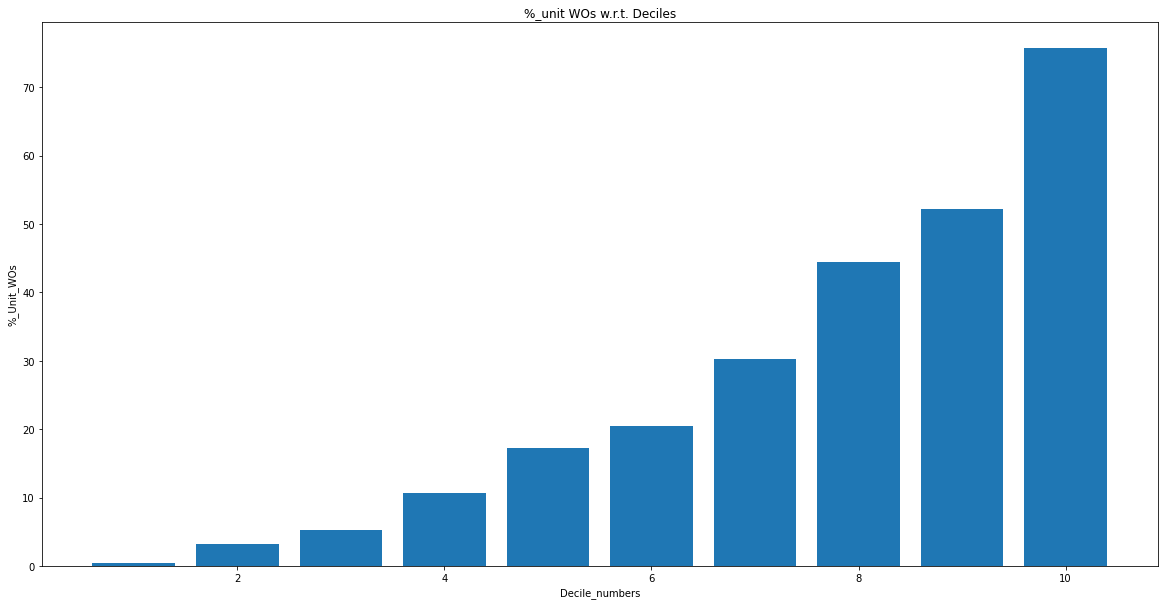

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Deciles")
plt.bar(final_df['Decile'],final_df['%_Unit_WO'])

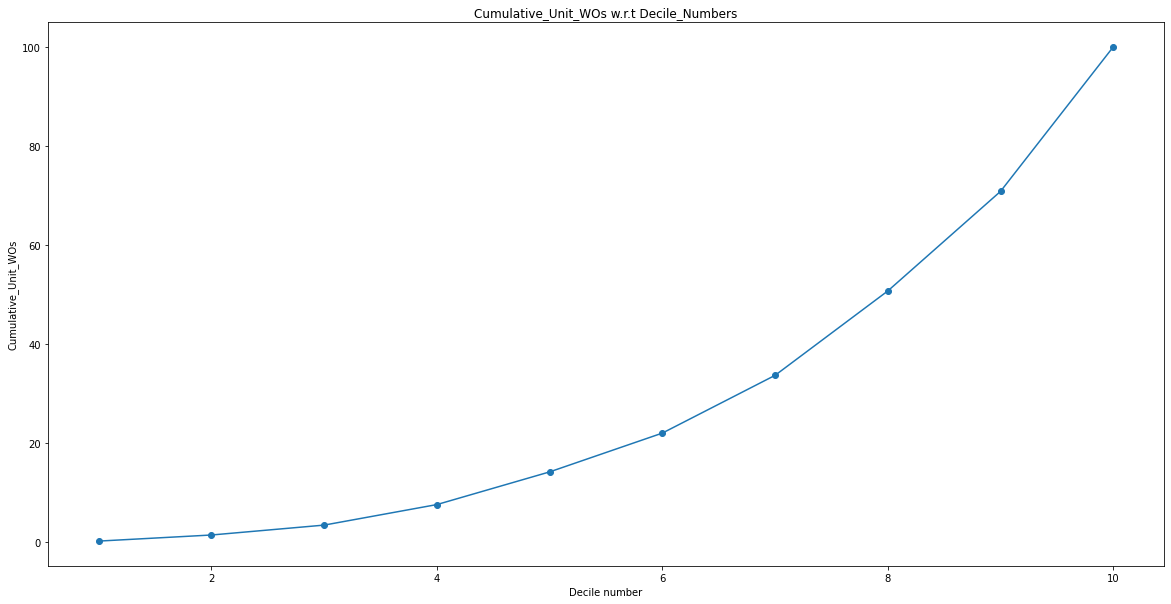

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Cum_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}

# For Validation data

In [ ]:
#converting this into a dataframe as y_val is a series {we get retained indexes}
check = pd.DataFrame(y_val)
check

,WriteOff_YN
1786,1
528,0
449,0
1292,0
1097,1
...,...
2684,1
1237,0
2912,1
2721,0


In [ ]:
check['Predicted Values'] = predict_y_val

In [ ]:
check

,WriteOff_YN,Predicted Values
1786,1,0
528,0,0
449,0,0
1292,0,1
1097,1,1
...,...,...
2684,1,0
1237,0,0
2912,1,1
2721,0,0


In [ ]:
predict_y_proba_val

array([[0.6642211 , 0.3357789 ],
       [0.66571045, 0.33428958],
       [0.81453073, 0.18546927],
       ...,
       [0.42637235, 0.57362765],
       [0.84519416, 0.15480584],
       [0.86022854, 0.13977148]], dtype=float32)

In [ ]:
write_off1 = []
for i in predict_y_proba_val:
  write_off1.append(i[1])


In [ ]:
check['Predicted_Prob_WO = 1'] = write_off1

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
1786,1,0,0.335779
528,0,0,0.334290
449,0,0,0.185469
1292,0,1,0.650804
1097,1,1,0.595659
...,...,...,...
2684,1,0,0.252477
1237,0,0,0.211822
2912,1,1,0.573628
2721,0,0,0.154806


In [ ]:
check['OpportunityID'] = None

In [ ]:
for i in check.index:
  check['OpportunityID'][i] = data['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
1786,1,0,0.335779,0062M00000mUgl6QAC
528,0,0,0.334290,0062M00000npOIWQA2
449,0,0,0.185469,0062M00000cD6TUQA0
1292,0,1,0.650804,0062M00000bngfeQAA
1097,1,1,0.595659,0062M00000lWdx9QAC
...,...,...,...,...
2684,1,0,0.252477,0062M00000lwNQYQA2
1237,0,0,0.211822,0062M00000n29LcQAI
2912,1,1,0.573628,0062M00000lWlgsQAC
2721,0,0,0.154806,0062M00000mzfNbQAI


In [ ]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.8803756
Min_propability_value:  0.059467733


In [ ]:
check['Decile'] = None

In [ ]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5, funded_amt_d6, funded_amt_d7, funded_amt_d8, funded_amt_d9, funded_amt_d10 = 0,0,0,0,0,0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10 = 0,0,0,0,0,0,0,0,0,0
advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10 = 0,0,0,0,0,0,0,0,0,0

for i in check.index:

  if check["Predicted_Prob_WO = 1"][i]>=min_range[9]:
    d=10
    funded_amt_d10 = funded_amt_d10+data['FundedAmount'][i]
    gross_amt_d10 = gross_amt_d10 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d10 = advanced_amt_d10 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[8]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[8]):
    d=9
    funded_amt_d9 = funded_amt_d9+data['FundedAmount'][i]
    gross_amt_d9 = gross_amt_d9 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d9 = advanced_amt_d9 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[7]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[7]):
    d=8
    funded_amt_d8 = funded_amt_d8+data['FundedAmount'][i]
    gross_amt_d8 = gross_amt_d8 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d8 = advanced_amt_d8 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[6]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[6]):
    d=7
    funded_amt_d7 = funded_amt_d7+data['FundedAmount'][i]
    gross_amt_d7 = gross_amt_d7 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d7 = advanced_amt_d7 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[5]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[5]):
    d=6
    funded_amt_d6 = funded_amt_d6+data['FundedAmount'][i]
    gross_amt_d6 = gross_amt_d6+ data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d6 = advanced_amt_d6 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[4]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[4]):
    d=5
    funded_amt_d5 = funded_amt_d5+data['FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d5 = advanced_amt_d5 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[3]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[3]):
    d=4
    funded_amt_d4 = funded_amt_d4+data['FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d4 = advanced_amt_d4 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[2]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[2]):
    d=3
    funded_amt_d3 = funded_amt_d3+data['FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d3 = advanced_amt_d3 + data['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[1]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[1]):
    d=2
    funded_amt_d2 = funded_amt_d2+data['FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d2 = advanced_amt_d2 + data['WOGross_AdvanceBalance'][i]
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data['FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d1 = advanced_amt_d1 + data['WOGross_AdvanceBalance'][i]
  check['Decile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
1786,1,0,0.335779,0062M00000mUgl6QAC,5
528,0,0,0.334290,0062M00000npOIWQA2,5
449,0,0,0.185469,0062M00000cD6TUQA0,3
1292,0,1,0.650804,0062M00000bngfeQAA,8
1097,1,1,0.595659,0062M00000lWdx9QAC,7
...,...,...,...,...,...
2684,1,0,0.252477,0062M00000lwNQYQA2,4
1237,0,0,0.211822,0062M00000n29LcQAI,3
2912,1,1,0.573628,0062M00000lWlgsQAC,7
2721,0,0,0.154806,0062M00000mzfNbQAI,2


In [ ]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
162,0,0,0.059468,0062M00000lWC60QAG,1
1173,0,0,0.075513,0062M00000iR5XIQA0,1
332,0,0,0.075990,0062M00000lr5eRQAQ,1
1862,0,0,0.078909,0062M00000n2hYqQAI,1
2831,0,0,0.080873,0062M00000nFjeLQAS,1
...,...,...,...,...,...
790,1,1,0.857116,0062M00000iR6m2QAC,10
1507,0,1,0.865111,0062M00000nGUyGQAW,10
1146,1,1,0.877311,0062M00000bo044QAA,10
637,1,1,0.879126,0062M00000nYPkbQAG,10


In [ ]:
# this will check nan values, missing_values by itself
check['Decile'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

In [ ]:
exp_df = check.copy()

In [ ]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
162,0,0,0.059468,0062M00000lWC60QAG,1
1173,0,0,0.075513,0062M00000iR5XIQA0,1
332,0,0,0.075990,0062M00000lr5eRQAQ,1
1862,0,0,0.078909,0062M00000n2hYqQAI,1
2831,0,0,0.080873,0062M00000nFjeLQAS,1
...,...,...,...,...,...
790,1,1,0.857116,0062M00000iR6m2QAC,10
1507,0,1,0.865111,0062M00000nGUyGQAW,10
1146,1,1,0.877311,0062M00000bo044QAA,10
637,1,1,0.879126,0062M00000nYPkbQAG,10


Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i)


In [ ]:
N = len(exp_df)
N

627

In [ ]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

159

In [ ]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39%
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Decile"] == 1]["WriteOff_YN"].value_counts()

0    51
1     2
Name: WriteOff_YN, dtype: int64

In [ ]:
m_1 = len(exp_df[(exp_df["Decile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Decile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Decile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Decile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Decile"] == 5) & (exp_df["WriteOff_YN"] ==1)])
m_6 = len(exp_df[(exp_df["Decile"] == 6) & (exp_df["WriteOff_YN"] ==1)])
m_7 = len(exp_df[(exp_df["Decile"] == 7) & (exp_df["WriteOff_YN"] ==1)])
m_8 = len(exp_df[(exp_df["Decile"] == 8) & (exp_df["WriteOff_YN"] ==1)])
m_9 = len(exp_df[(exp_df["Decile"] == 9) & (exp_df["WriteOff_YN"] ==1)])
m_10 = len(exp_df[(exp_df["Decile"] == 10) & (exp_df["WriteOff_YN"] ==1)])

In [ ]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10

(2, 3, 4, 6, 14, 18, 19, 28, 39, 26)

In [ ]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5
M_6 = M_5 + m_6
M_7 = M_6 + m_7
M_8 = M_7 + m_8
M_9 = M_8 + m_9
M_10 = M_9 + m_10

In [ ]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10

(2, 5, 9, 15, 29, 47, 66, 94, 133, 159)

In [ ]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Decile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Decile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Decile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Decile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Decile"] == 5])
rr_6 = 100 * m_6/len(exp_df[exp_df["Decile"] == 6])
rr_7 = 100 * m_7/len(exp_df[exp_df["Decile"] == 7])
rr_8 = 100 * m_8/len(exp_df[exp_df["Decile"] == 8])
rr_9 = 100 * m_9/len(exp_df[exp_df["Decile"] == 9])
rr_10 = 100 * m_10/len(exp_df[exp_df["Decile"] == 10])

In [ ]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10)

3.7735849056603774 4.285714285714286 6.666666666666667 8.450704225352112 20.0 35.294117647058826 27.941176470588236 43.75 53.42465753424658 55.319148936170215


In [ ]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)
cg_6 = 100*(M_6/P)
cg_7 = 100*(M_7/P)
cg_8 = 100*(M_8/P)
cg_9 = 100*(M_9/P)
cg_10 = 100*(M_10/P)

In [ ]:
print(cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10)

1.257861635220126 3.1446540880503147 5.660377358490567 9.433962264150944 18.238993710691823 29.559748427672954 41.509433962264154 59.11949685534591 83.64779874213836 100.0


In [ ]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i)
lift_1 = cg_1/(10*1)
lift_2 = cg_2/(10*2)
lift_3 = cg_3/(10*3)
lift_4 = cg_4/(10*4)
lift_5 = cg_5/(10*5)
lift_6 = cg_6/(10*6)
lift_7 = cg_7/(10*7)
lift_8 = cg_8/(10*8)
lift_9 = cg_9/(10*9)
lift_10 = cg_10/(10*10)
print(lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10)

0.1257861635220126 0.15723270440251574 0.18867924528301888 0.2358490566037736 0.36477987421383645 0.49266247379454925 0.5929919137466307 0.7389937106918238 0.9294199860237596 1.0


In [ ]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5,funded_amt_d6,funded_amt_d7,funded_amt_d8,funded_amt_d9,funded_amt_d10]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10]
advanced_amt = [advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10]

In [ ]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10]

In [ ]:
no_of_opps = [len(exp_df[exp_df['Decile']==1]),len(exp_df[exp_df['Decile']==2]),len(exp_df[exp_df['Decile']==3]),
              len(exp_df[exp_df['Decile']==4]),len(exp_df[exp_df['Decile']==5]),len(exp_df[exp_df['Decile']==6]),
              len(exp_df[exp_df['Decile']==7]),len(exp_df[exp_df['Decile']==8]),len(exp_df[exp_df['Decile']==9]),
              len(exp_df[exp_df['Decile']==10])]

In [ ]:
no_of_opps

[53, 70, 60, 71, 70, 51, 68, 64, 73, 47]

In [ ]:
sum(no_of_opps)

627

In [ ]:
funded_amt

[615000.0,
 1440000.0,
 1398500.0,
 1851000.0,
 1223200.0,
 2829100.0,
 2451321.0,
 1515000.0,
 2316800.0,
 692692.0]

In [ ]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.03765472, 0.08816715, 0.08562623, 0.11333153, 0.0748931 ,
       0.17321784, 0.1500875 , 0.09275919, 0.14185115, 0.04241158])

In [ ]:
gross_amt

[3205.41,
 6632.1,
 15412.88,
 80370.35,
 119760.28,
 156004.73,
 197981.71,
 432571.51999999996,
 484068.6,
 276018.18]

In [ ]:
cum_gross_pct = []
for i in range(1,11):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.0018088958255324684,
 0.005551561507774018,
 0.01424944860846718,
 0.05960451726164523,
 0.12718834290535372,
 0.21522584976417047,
 0.3269520528866352,
 0.571063357453675,
 0.84423579711392,
 1.0]

In [ ]:
gross_amt_pct = []
for i in range(10):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.005212048780487805,
 0.004605625,
 0.011021008223096174,
 0.043419962182604,
 0.0979073577501635,
 0.05514288289562052,
 0.0807653138858599,
 0.28552575577557754,
 0.20893844958563534,
 0.39847173058155716]

In [ ]:
dict_try = {"Decile": [i for i in range(1,11)],
            "No_of_Opps" : no_of_opps,
            "No_of_WOs" : no_of_wos,
            "%_Unit_WO": rr,
            "Cum_Unit_WOs" : cg,
            #'Lift': lift,
            'Funded_$':funded_amt,
            '%_Funded_$':funded_amt_pct,
            'Funded_WO_Gross_$':gross_amt,
            '%_Funded_WO_Gross_$':gross_amt_pct,
            "Cum_WO_$" :cum_gross_pct,
            'WOGross_Adv_Bal':advanced_amt,
            'Avg_Score':avg_range_dec,
            'Min_Score': min_range_dec,
            'Max_Score': max_range_dec}

final_df = pd.DataFrame(dict_try)
final_df


,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,53,2,3.773585,1.257862,615000.0,0.037655,3205.41,0.005212,0.001809,25473.30,10.73,4.63,13.09
1,2,70,3,4.285714,3.144654,1440000.0,0.088167,6632.10,0.004606,0.005552,18207.15,15.53,13.12,18.47
2,3,60,4,6.666667,5.660377,1398500.0,0.085626,15412.88,0.011021,0.014249,32796.58,21.09,18.50,24.65
3,4,71,6,8.450704,9.433962,1851000.0,0.113332,80370.35,0.043420,0.059605,164272.82,27.78,24.68,31.77
4,5,70,14,20.000000,18.238994,1223200.0,0.074893,119760.28,0.097907,0.127188,214200.69,38.24,31.78,45.01
5,6,51,18,35.294118,29.559748,2829100.0,0.173218,156004.73,0.055143,0.215226,663263.54,50.87,45.10,55.41
6,7,68,19,27.941176,41.509434,2451321.0,0.150087,197981.71,0.080765,0.326952,387017.57,59.39,55.41,62.73
7,8,64,28,43.750000,59.119497,1515000.0,0.092759,432571.52,0.285526,0.571063,788161.52,66.08,62.76,69.00
8,9,73,39,53.424658,83.647799,2316800.0,0.141851,484068.60,0.208938,0.844236,999720.87,72.40,69.05,75.86
9,10,47,26,55.319149,100.000000,692692.0,0.042412,276018.18,0.398472,1.000000,638607.43,80.58,75.96,92.59


In [ ]:
final_df['%_Funded_$'] = 100*final_df['%_Funded_$']
final_df['%_Funded_WO_Gross_$'] = 100*final_df['%_Funded_WO_Gross_$']
final_df['Cum_WO_$'] = 100*final_df['Cum_WO_$']
final_df = final_df.round(2)
final_df

,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,53,2,3.77,1.26,615000.0,3.77,3205.41,0.52,0.18,25473.30,10.73,4.63,13.09
1,2,70,3,4.29,3.14,1440000.0,8.82,6632.10,0.46,0.56,18207.15,15.53,13.12,18.47
2,3,60,4,6.67,5.66,1398500.0,8.56,15412.88,1.10,1.42,32796.58,21.09,18.50,24.65
3,4,71,6,8.45,9.43,1851000.0,11.33,80370.35,4.34,5.96,164272.82,27.78,24.68,31.77
4,5,70,14,20.00,18.24,1223200.0,7.49,119760.28,9.79,12.72,214200.69,38.24,31.78,45.01
5,6,51,18,35.29,29.56,2829100.0,17.32,156004.73,5.51,21.52,663263.54,50.87,45.10,55.41
6,7,68,19,27.94,41.51,2451321.0,15.01,197981.71,8.08,32.70,387017.57,59.39,55.41,62.73
7,8,64,28,43.75,59.12,1515000.0,9.28,432571.52,28.55,57.11,788161.52,66.08,62.76,69.00
8,9,73,39,53.42,83.65,2316800.0,14.19,484068.60,20.89,84.42,999720.87,72.40,69.05,75.86
9,10,47,26,55.32,100.00,692692.0,4.24,276018.18,39.85,100.00,638607.43,80.58,75.96,92.59


<BarContainer object of 10 artists>

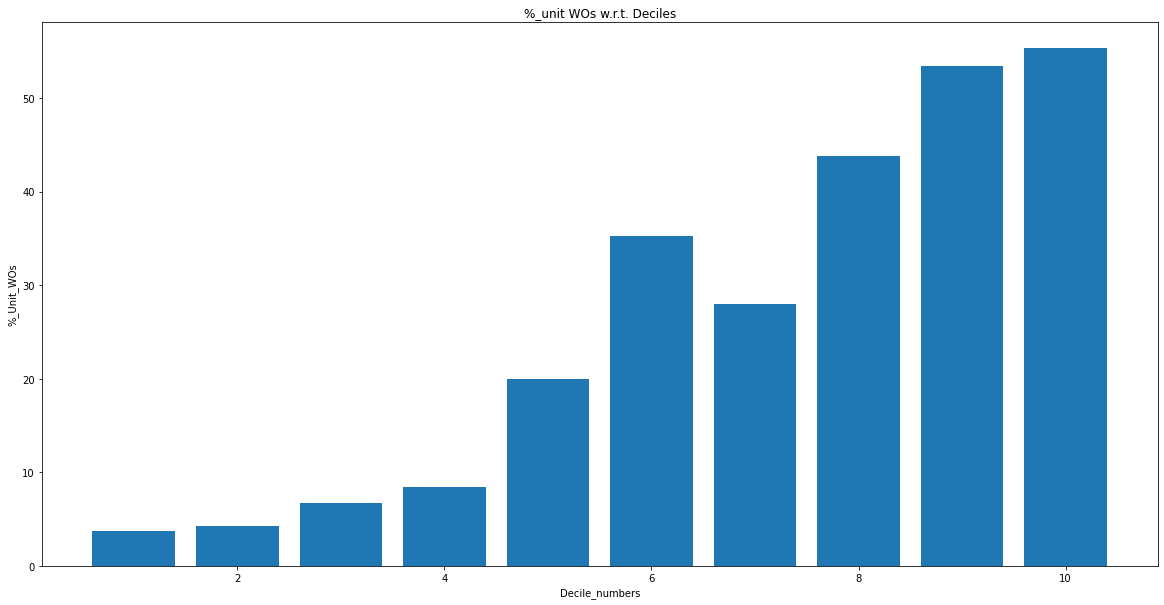

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Deciles")
plt.bar(final_df['Decile'],final_df['%_Unit_WO'])

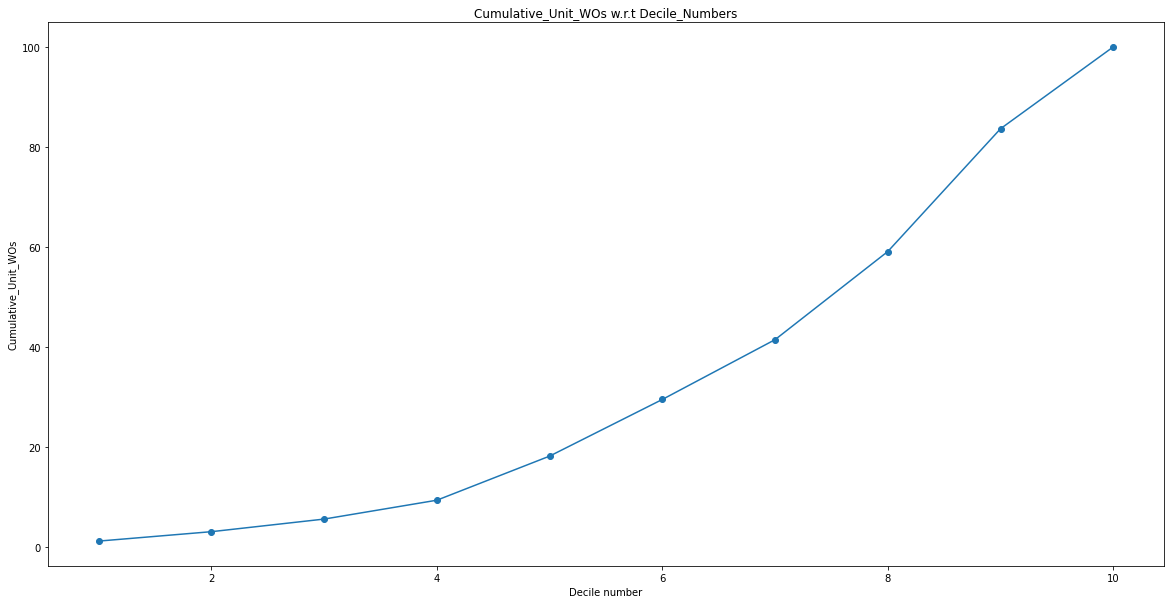

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Cum_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}

# For Test Set

In [ ]:
#converting this into a dataframe as y_test is a series {we get retained indexes}
check = pd.DataFrame(y_test)
check

,WriteOff_YN
0,0
1,0
2,0
3,0
4,0
...,...
481,0
482,0
483,0
484,0


In [ ]:
check['Predicted Values'] = predict_y_test

In [ ]:
check

,WriteOff_YN,Predicted Values
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
481,0,1
482,0,1
483,0,1
484,0,0


In [ ]:
print(predict_y_proba_test)

[[0.28461277 0.7153872 ]
 [0.66327024 0.33672974]
 [0.22862142 0.7713786 ]
 [0.8026972  0.1973028 ]
 [0.36226732 0.6377327 ]
 [0.3093844  0.6906156 ]
 [0.4995337  0.5004663 ]
 [0.43662858 0.5633714 ]
 [0.27223527 0.7277647 ]
 [0.36792374 0.63207626]
 [0.44089067 0.55910933]
 [0.31859332 0.6814067 ]
 [0.45840514 0.54159486]
 [0.4915139  0.5084861 ]
 [0.20207405 0.79792595]
 [0.5781908  0.4218092 ]
 [0.6462403  0.3537597 ]
 [0.23659337 0.76340663]
 [0.24544352 0.7545565 ]
 [0.48416293 0.5158371 ]
 [0.5397574  0.4602426 ]
 [0.9009522  0.09904777]
 [0.26820576 0.73179424]
 [0.47340953 0.52659047]
 [0.38097    0.61903   ]
 [0.24282926 0.75717074]
 [0.6845926  0.31540737]
 [0.29058504 0.70941496]
 [0.8367979  0.1632021 ]
 [0.79180324 0.20819674]
 [0.31630147 0.68369853]
 [0.8949257  0.10507429]
 [0.8307183  0.16928169]
 [0.19034302 0.809657  ]
 [0.16748494 0.83251506]
 [0.33564115 0.66435885]
 [0.8828082  0.11719179]
 [0.8211777  0.17882231]
 [0.20424134 0.79575866]
 [0.7992343  0.20076571]


In [ ]:
write_off1 = []
for i in predict_y_proba_test:
  write_off1.append(i[1])


In [ ]:
check['Predicted_Prob_WO = 1'] = write_off1

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
0,0,1,0.715387
1,0,0,0.336730
2,0,1,0.771379
3,0,0,0.197303
4,0,1,0.637733
...,...,...,...
481,0,1,0.800026
482,0,1,0.778790
483,0,1,0.729231
484,0,0,0.116408


In [ ]:
check['OpportunityID'] = None

In [ ]:
for i in check.index:
  check['OpportunityID'][i] = data_test['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
0,0,1,0.715387,0062M00000nqf6oQAA
1,0,0,0.336730,0062M00000nqfF3QAI
2,0,1,0.771379,0062M00000nqjtvQAA
3,0,0,0.197303,0062M00000nqs8FQAQ
4,0,1,0.637733,0062M00000nr94cQAA
...,...,...,...,...
481,0,1,0.800026,0062M00000oYVfWQAW
482,0,1,0.778790,0062M00000oYVWyQAO
483,0,1,0.729231,0062M00000oYYg7QAG
484,0,0,0.116408,0062M00000oYZI3QAO


In [ ]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.8725887
Min_propability_value:  0.06348297


In [ ]:
check['Decile'] = None

In [ ]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5, funded_amt_d6, funded_amt_d7, funded_amt_d8, funded_amt_d9, funded_amt_d10 = 0,0,0,0,0,0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10 = 0,0,0,0,0,0,0,0,0,0
advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10 = 0,0,0,0,0,0,0,0,0,0

for i in check.index:

  if check["Predicted_Prob_WO = 1"][i]>=min_range[9]:
    d=10
    funded_amt_d10 = funded_amt_d10+data_test['FundedAmount'][i]
    gross_amt_d10 = gross_amt_d10 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d10 = advanced_amt_d10 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[8]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[8]):
    d=9
    funded_amt_d9 = funded_amt_d9+data_test['FundedAmount'][i]
    gross_amt_d9 = gross_amt_d9 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d9 = advanced_amt_d9 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[7]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[7]):
    d=8
    funded_amt_d8 = funded_amt_d8+data_test['FundedAmount'][i]
    gross_amt_d8 = gross_amt_d8 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d8 = advanced_amt_d8 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[6]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[6]):
    d=7
    funded_amt_d7 = funded_amt_d7+data_test['FundedAmount'][i]
    gross_amt_d7 = gross_amt_d7 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d7 = advanced_amt_d7 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[5]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[5]):
    d=6
    funded_amt_d6 = funded_amt_d6+data_test['FundedAmount'][i]
    gross_amt_d6 = gross_amt_d6+ data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d6 = advanced_amt_d6 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[4]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[4]):
    d=5
    funded_amt_d5 = funded_amt_d5+data_test['FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d5 = advanced_amt_d5 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[3]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[3]):
    d=4
    funded_amt_d4 = funded_amt_d4+data_test['FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d4 = advanced_amt_d4 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[2]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[2]):
    d=3
    funded_amt_d3 = funded_amt_d3+data_test['FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d3 = advanced_amt_d3 + data_test['WOGross_AdvanceBalance'][i]
  elif (check["Predicted_Prob_WO = 1"][i] >= min_range[1]) & (check["Predicted_Prob_WO = 1"][i] <= max_range[1]):
    d=2
    funded_amt_d2 = funded_amt_d2+data_test['FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d2 = advanced_amt_d2 + data_test['WOGross_AdvanceBalance'][i]
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data_test['FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data_test['FundedWriteOffAmount_Gross'][i]
    advanced_amt_d1 = advanced_amt_d1 + data_test['WOGross_AdvanceBalance'][i]
  check['Decile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
0,0,1,0.715387,0062M00000nqf6oQAA,9
1,0,0,0.336730,0062M00000nqfF3QAI,5
2,0,1,0.771379,0062M00000nqjtvQAA,10
3,0,0,0.197303,0062M00000nqs8FQAQ,3
4,0,1,0.637733,0062M00000nr94cQAA,8
...,...,...,...,...,...
481,0,1,0.800026,0062M00000oYVfWQAW,10
482,0,1,0.778790,0062M00000oYVWyQAO,10
483,0,1,0.729231,0062M00000oYYg7QAG,9
484,0,0,0.116408,0062M00000oYZI3QAO,1


In [ ]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
325,0,0,0.063483,0062M00000oPRcuQAG,1
254,0,0,0.075990,0062M00000oBvrOQAS,1
173,0,0,0.078909,0062M00000oAQqwQAG,1
201,0,0,0.086396,0062M00000oB03NQAS,1
151,0,0,0.086658,0062M00000oAen7QAC,1
...,...,...,...,...,...
143,1,1,0.843398,0062M00000oAd5HQAS,10
322,1,1,0.853358,0062M00000oPQOUQA4,10
44,1,1,0.853358,0062M00000o8pSmQAI,10
439,1,1,0.866656,0062M00000oXyg9QAC,10


In [ ]:
# this will check nan values, missing_values by itself
check['Decile'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

In [ ]:
exp_df = check.copy()

In [ ]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
325,0,0,0.063483,0062M00000oPRcuQAG,1
254,0,0,0.075990,0062M00000oBvrOQAS,1
173,0,0,0.078909,0062M00000oAQqwQAG,1
201,0,0,0.086396,0062M00000oB03NQAS,1
151,0,0,0.086658,0062M00000oAen7QAC,1
...,...,...,...,...,...
143,1,1,0.843398,0062M00000oAd5HQAS,10
322,1,1,0.853358,0062M00000oPQOUQA4,10
44,1,1,0.853358,0062M00000o8pSmQAI,10
439,1,1,0.866656,0062M00000oXyg9QAC,10


Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i)


In [ ]:
N = len(exp_df)
N

486

In [ ]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

114

In [ ]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39%
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Decile"] == 1]["WriteOff_YN"].value_counts()

0    42
1     2
Name: WriteOff_YN, dtype: int64

In [ ]:
m_1 = len(exp_df[(exp_df["Decile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Decile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Decile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Decile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Decile"] == 5) & (exp_df["WriteOff_YN"] ==1)])
m_6 = len(exp_df[(exp_df["Decile"] == 6) & (exp_df["WriteOff_YN"] ==1)])
m_7 = len(exp_df[(exp_df["Decile"] == 7) & (exp_df["WriteOff_YN"] ==1)])
m_8 = len(exp_df[(exp_df["Decile"] == 8) & (exp_df["WriteOff_YN"] ==1)])
m_9 = len(exp_df[(exp_df["Decile"] == 9) & (exp_df["WriteOff_YN"] ==1)])
m_10 = len(exp_df[(exp_df["Decile"] == 10) & (exp_df["WriteOff_YN"] ==1)])

In [ ]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10

(2, 1, 3, 3, 6, 9, 22, 14, 29, 25)

In [ ]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5
M_6 = M_5 + m_6
M_7 = M_6 + m_7
M_8 = M_7 + m_8
M_9 = M_8 + m_9
M_10 = M_9 + m_10

In [ ]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10

(2, 3, 6, 9, 15, 24, 46, 60, 89, 114)

In [ ]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Decile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Decile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Decile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Decile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Decile"] == 5])
rr_6 = 100 * m_6/len(exp_df[exp_df["Decile"] == 6])
rr_7 = 100 * m_7/len(exp_df[exp_df["Decile"] == 7])
rr_8 = 100 * m_8/len(exp_df[exp_df["Decile"] == 8])
rr_9 = 100 * m_9/len(exp_df[exp_df["Decile"] == 9])
rr_10 = 100 * m_10/len(exp_df[exp_df["Decile"] == 10])

In [ ]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10)

4.545454545454546 2.7027027027027026 6.122448979591836 7.6923076923076925 11.764705882352942 19.148936170212767 39.285714285714285 28.571428571428573 42.64705882352941 54.34782608695652


In [ ]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)
cg_6 = 100*(M_6/P)
cg_7 = 100*(M_7/P)
cg_8 = 100*(M_8/P)
cg_9 = 100*(M_9/P)
cg_10 = 100*(M_10/P)

In [ ]:
print(cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10)

1.7543859649122806 2.631578947368421 5.263157894736842 7.894736842105263 13.157894736842104 21.052631578947366 40.35087719298245 52.63157894736842 78.0701754385965 100.0


In [ ]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i)
lift_1 = cg_1/(10*1)
lift_2 = cg_2/(10*2)
lift_3 = cg_3/(10*3)
lift_4 = cg_4/(10*4)
lift_5 = cg_5/(10*5)
lift_6 = cg_6/(10*6)
lift_7 = cg_7/(10*7)
lift_8 = cg_8/(10*8)
lift_9 = cg_9/(10*9)
lift_10 = cg_10/(10*10)
print(lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10)

0.17543859649122806 0.13157894736842105 0.17543859649122806 0.19736842105263158 0.2631578947368421 0.3508771929824561 0.5764411027568922 0.6578947368421052 0.8674463937621832 1.0


In [ ]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5,funded_amt_d6,funded_amt_d7,funded_amt_d8,funded_amt_d9,funded_amt_d10]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10]
advanced_amt = [advanced_amt_d1, advanced_amt_d2, advanced_amt_d3, advanced_amt_d4, advanced_amt_d5, advanced_amt_d6, advanced_amt_d7, advanced_amt_d8, advanced_amt_d9, advanced_amt_d10]

In [ ]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10]

In [ ]:
no_of_opps = [len(exp_df[exp_df['Decile']==1]),len(exp_df[exp_df['Decile']==2]),len(exp_df[exp_df['Decile']==3]),
              len(exp_df[exp_df['Decile']==4]),len(exp_df[exp_df['Decile']==5]),len(exp_df[exp_df['Decile']==6]),
              len(exp_df[exp_df['Decile']==7]),len(exp_df[exp_df['Decile']==8]),len(exp_df[exp_df['Decile']==9]),
              len(exp_df[exp_df['Decile']==10])]

In [ ]:
no_of_opps

[44, 37, 49, 39, 51, 47, 56, 49, 68, 46]

In [ ]:
sum(no_of_opps)

486

In [ ]:
funded_amt

[550500,
 490586,
 1875500,
 789500,
 736500,
 3566015,
 1680500,
 2141000,
 1712000,
 726300]

In [ ]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.03858176, 0.03438269, 0.1314443 , 0.05533206, 0.05161756,
       0.24992394, 0.11777774, 0.15005185, 0.11998541, 0.05090269])

In [ ]:
gross_amt

[0.0,
 3481.25,
 32079.15,
 14911.74,
 23413.11,
 47820.649999999994,
 164095.54999999996,
 72630.83000000002,
 469011.5400000001,
 166470.52000000002]

In [ ]:
cum_gross_pct = []
for i in range(1,11):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.0,
 0.0035025654222878,
 0.035778133556257974,
 0.05078117697748479,
 0.07433764362429865,
 0.1224510957352723,
 0.28755138999201874,
 0.36062693290047504,
 0.8325101939871398,
 1.0]

In [ ]:
gross_amt_pct = []
for i in range(10):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.0,
 0.007096105473861872,
 0.01710431884830712,
 0.018887574414186193,
 0.03178969450101833,
 0.013410109043287814,
 0.09764686105325794,
 0.03392378794955629,
 0.2739553387850468,
 0.2292035247143054]

In [ ]:
dict_try = {"Decile": [i for i in range(1,11)],
            "No_of_Opps" : no_of_opps,
            "No_of_WOs" : no_of_wos,
            "%_Unit_WO": rr,
            "Cum_Unit_WOs" : cg,
            #'Lift': lift,
            'Funded_$':funded_amt,
            '%_Funded_$':funded_amt_pct,
            'Funded_WO_Gross_$':gross_amt,
            '%_Funded_WO_Gross_$':gross_amt_pct,
            "Cum_WO_$" :cum_gross_pct,
            'WOGross_Adv_Bal':advanced_amt,
            'Avg_Score':avg_range_dec,
            'Min_Score': min_range_dec,
            'Max_Score': max_range_dec}

final_df = pd.DataFrame(dict_try)
final_df


,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,44,2,4.545455,1.754386,550500,0.038582,0.00,0.000000,0.000000,6291.84,10.73,4.63,13.09
1,2,37,1,2.702703,2.631579,490586,0.034383,3481.25,0.007096,0.003503,8381.25,15.53,13.12,18.47
2,3,49,3,6.122449,5.263158,1875500,0.131444,32079.15,0.017104,0.035778,65769.15,21.09,18.50,24.65
3,4,39,3,7.692308,7.894737,789500,0.055332,14911.74,0.018888,0.050781,33551.72,27.78,24.68,31.77
4,5,51,6,11.764706,13.157895,736500,0.051618,23413.11,0.031790,0.074338,47840.46,38.24,31.78,45.01
5,6,47,9,19.148936,21.052632,3566015,0.249924,47820.65,0.013410,0.122451,103703.94,50.87,45.10,55.41
6,7,56,22,39.285714,40.350877,1680500,0.117778,164095.55,0.097647,0.287551,314895.29,59.39,55.41,62.73
7,8,49,14,28.571429,52.631579,2141000,0.150052,72630.83,0.033924,0.360627,156727.66,66.08,62.76,69.00
8,9,68,29,42.647059,78.070175,1712000,0.119985,469011.54,0.273955,0.832510,786536.54,72.40,69.05,75.86
9,10,46,25,54.347826,100.000000,726300,0.050903,166470.52,0.229204,1.000000,395072.17,80.58,75.96,92.59


In [ ]:
final_df['%_Funded_$'] = 100*final_df['%_Funded_$']
final_df['%_Funded_WO_Gross_$'] = 100*final_df['%_Funded_WO_Gross_$']
final_df['Cum_WO_$'] = 100*final_df['Cum_WO_$']
final_df = final_df.round(2)
final_df

,Decile,No_of_Opps,No_of_WOs,%_Unit_WO,Cum_Unit_WOs,Funded_$,%_Funded_$,Funded_WO_Gross_$,%_Funded_WO_Gross_$,Cum_WO_$,WOGross_Adv_Bal,Avg_Score,Min_Score,Max_Score
0,1,44,2,4.55,1.75,550500,3.86,0.00,0.00,0.00,6291.84,10.73,4.63,13.09
1,2,37,1,2.70,2.63,490586,3.44,3481.25,0.71,0.35,8381.25,15.53,13.12,18.47
2,3,49,3,6.12,5.26,1875500,13.14,32079.15,1.71,3.58,65769.15,21.09,18.50,24.65
3,4,39,3,7.69,7.89,789500,5.53,14911.74,1.89,5.08,33551.72,27.78,24.68,31.77
4,5,51,6,11.76,13.16,736500,5.16,23413.11,3.18,7.43,47840.46,38.24,31.78,45.01
5,6,47,9,19.15,21.05,3566015,24.99,47820.65,1.34,12.25,103703.94,50.87,45.10,55.41
6,7,56,22,39.29,40.35,1680500,11.78,164095.55,9.76,28.76,314895.29,59.39,55.41,62.73
7,8,49,14,28.57,52.63,2141000,15.01,72630.83,3.39,36.06,156727.66,66.08,62.76,69.00
8,9,68,29,42.65,78.07,1712000,12.00,469011.54,27.40,83.25,786536.54,72.40,69.05,75.86
9,10,46,25,54.35,100.00,726300,5.09,166470.52,22.92,100.00,395072.17,80.58,75.96,92.59


<BarContainer object of 10 artists>

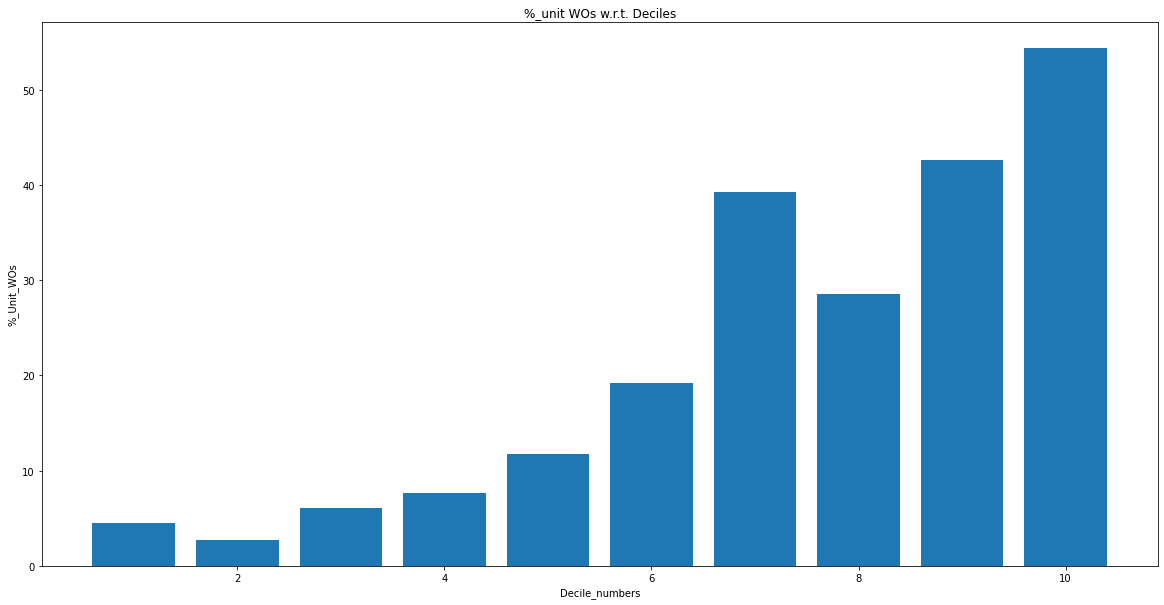

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Deciles")
plt.bar(final_df['Decile'],final_df['%_Unit_WO'])

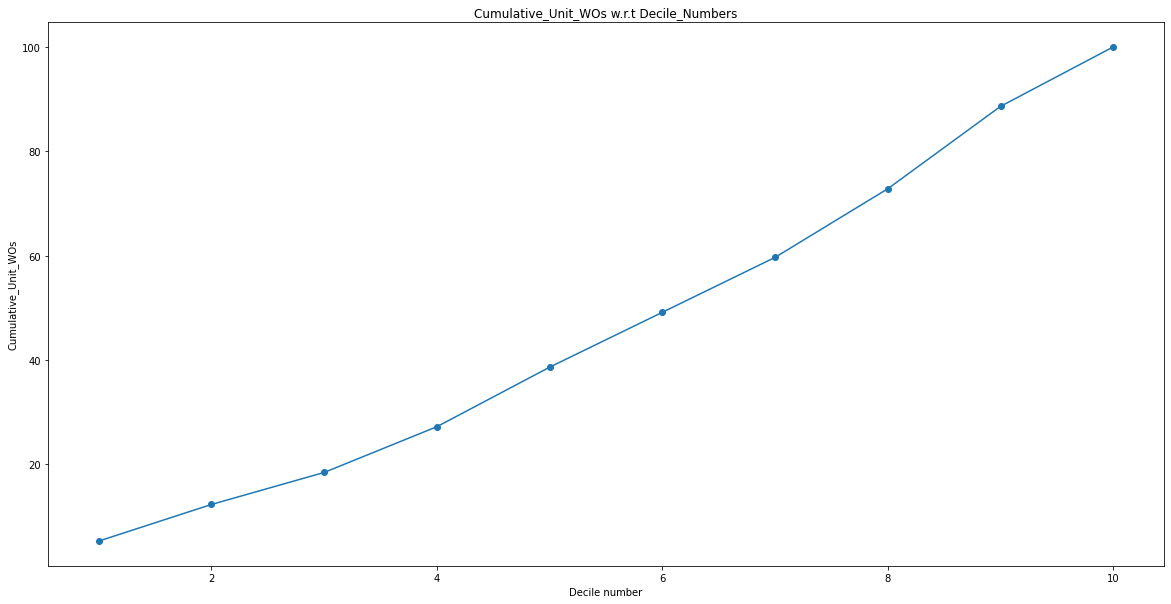

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Cum_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}